In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [2]:
train_path = "dataset/train.csv"
test_path  = "dataset/test.csv"

In [3]:
class LinearRegression:
    def __init__(self,x_data,y_data):
        self.x = np.array(x_data)
        self.y = np.array(y_data)
        self.x_mean = self.calculateMean(self.x)
        self.y_mean = self.calculateMean(self.y)
        self.slope = 0
        self.intercept = 0
        self.size = len(self.x)
        self.error = 0
        self.prediction = []
        self.predictY()
    
    def calculateMean(self,data):
        return sum(data)/len(data)
    
    def calculateSlope(self):
        for idx in range(self.size):
            n = (self.x[idx]-self.x_mean)*(self.y[idx]-self.y_mean)
            d = (self.x[idx]-self.x_mean)**2
            self.slope += n//d
    
    def calculateBias(self):
        self.intercept = self.y_mean - (self.slope*self.x_mean)
    
    def gradientDescent(self,iteration,alpha):
        slope = 0
        intercept = 0
        for itr in range(iteration):
            tmp_slop = 0
            tmp_intercept = 0
            for idx in range(self.size):
                tmp_intercept = -(2/float(self.size))*(self.y[idx] - (self.slope * self.x[idx]) + self.intercept)
                tmp_slope = -(2/float(self.size))*self.x[idx]*(self.y[idx]-((self.slope*self.x[idx] + self.intercept)))
            slope = self.slope - (alpha*tmp_slope)
            intercept = self.intercept - (alpha*tmp_intercept)
            self.slope = slope
            self.intercept = intercept
    
    def predictY(self):
        self.prediction = []
        for idx in range(self.size):
            self.prediction.append((self.slope * self.x[idx]) + self.intercept)
        self.calculateError()
    
    def calculateError(self):
        self.error = 0
        for idx in range(self.size):
            self.error += (1/(2*float(self.size)))*(self.y[idx] - self.prediction[idx])**2
    
    def fit(self,alpha,iteration,epoch):
        for _ in range(epoch):
            self.gradientDescent(iteration=iteration,alpha=alpha)
            self.predictY()
    
    def plot(self):
#         b, m = polyfit(self.x, self.y, 1)
        plt.plot(self.x, self.y, '.')
        plt.plot(self.x,self.prediction,'-',scalex=self.size,scaley=self.size)
        plt.show()
        

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df['y'] = train_df['y'].fillna(sum(train_df['y'])/len(train_df['y']))

In [5]:
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
train_df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [7]:
test_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
test_df.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [9]:
model = LinearRegression(train_df['x'][300:],train_df['y'][300:])

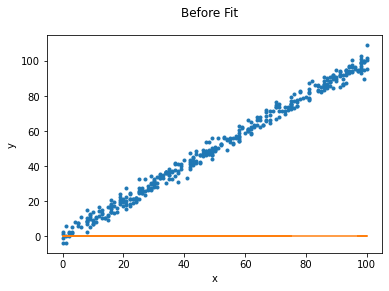

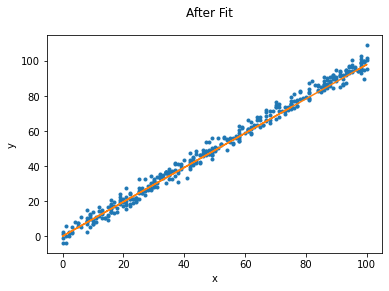

In [10]:
fig = plt.figure()
fig.suptitle('Before Fit')
plt.xlabel('x')
plt.ylabel('y')
model.plot()
fig = plt.figure()
fig.suptitle('After Fit')
plt.xlabel('x')
plt.ylabel('y')
model.fit(iteration=10,epoch=100,alpha=0.001)
model.plot()